# Least squares polynomial fitting

In [9]:
%matplotlib inline
import h5py
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse.linalg as sla

In [5]:
d = h5py.File('polynomial-ls-data.h5')
X = d['x'][:]
Y = d['y'][:]
d.close()

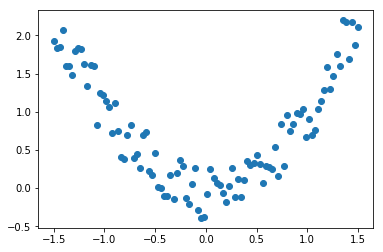

In [6]:
plt.plot(X,Y,'o')

In [14]:
# form the A matrix

N = X.shape
A = np.vstack((X**2, X, np.ones(N))).T
A

array([[ 2.25000000e+00, -1.50000000e+00,  1.00000000e+00],
       [ 2.16000918e+00, -1.46969697e+00,  1.00000000e+00],
       [ 2.07185491e+00, -1.43939394e+00,  1.00000000e+00],
       [ 1.98553719e+00, -1.40909091e+00,  1.00000000e+00],
       [ 1.90105601e+00, -1.37878788e+00,  1.00000000e+00],
       [ 1.81841139e+00, -1.34848485e+00,  1.00000000e+00],
       [ 1.73760331e+00, -1.31818182e+00,  1.00000000e+00],
       [ 1.65863177e+00, -1.28787879e+00,  1.00000000e+00],
       [ 1.58149679e+00, -1.25757576e+00,  1.00000000e+00],
       [ 1.50619835e+00, -1.22727273e+00,  1.00000000e+00],
       [ 1.43273646e+00, -1.19696970e+00,  1.00000000e+00],
       [ 1.36111111e+00, -1.16666667e+00,  1.00000000e+00],
       [ 1.29132231e+00, -1.13636364e+00,  1.00000000e+00],
       [ 1.22337006e+00, -1.10606061e+00,  1.00000000e+00],
       [ 1.15725436e+00, -1.07575758e+00,  1.00000000e+00],
       [ 1.09297521e+00, -1.04545455e+00,  1.00000000e+00],
       [ 1.03053260e+00, -1.01515152e+00

In [15]:
A.shape

(100, 3)

In [16]:
Y.shape

(100,)

In [18]:
theta = sla.lsmr(A, Y, damp=0)[0]

In [21]:
theta

array([ 0.98132098, -0.01954101, -0.00767347])

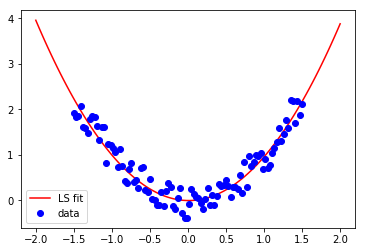

In [28]:
xp = np.linspace(-2,2,100)
def yp(xp,theta):
    return theta[0]*xp**2 + theta[1]*xp + theta[2]
    
plt.plot(xp, yp(xp,theta), 'r-', label='LS fit')
plt.plot(X,Y,'bo', label='data')
plt.legend()

In [33]:
from ipywidgets import interactive, fixed
def rlq(d, At, Yt):
    theta = sla.lsmr(At, Yt, damp=d)[0]
    plt.plot(xp, yp(xp,theta), 'r--', label='RLS')
    plt.plot(X, Y, 'ko', label='data')
    plt.text(-1.5, 0, 'd={}'.format(d))
    plt.ylim((-1,3))
    plt.legend(loc='lower right')
    
interactive(rlq, d=(0,10), At=fixed(A), Yt=fixed(Y))

interactive(children=(IntSlider(value=5, description='d', max=10), Output()), _dom_classes=('widget-interact',…